# Read Dataset

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd 
A = pd.read_csv("C:/Users/Arshadali Shaikh/Downloads/Attrition Case Study.csv")

In [2]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Missing Data treatment

In [4]:
A.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Define X and Y

In [5]:
Y = A[["MonthlyRate"]]
X = A.drop(labels=["Attrition","MonthlyRate","EmployeeCount","StandardHours"],axis=1)

# EDA

In [6]:
A.corr()["MonthlyRate"].sort_values()

YearsWithCurrManager       -0.036746
StockOptionLevel           -0.034323
DailyRate                  -0.032182
Education                  -0.026084
YearsAtCompany             -0.023655
JobInvolvement             -0.016322
HourlyRate                 -0.015297
YearsInCurrentRole         -0.012815
PerformanceRating          -0.009811
PercentSalaryHike          -0.006429
RelationshipSatisfaction   -0.004085
JobSatisfaction             0.000644
TrainingTimesLastYear       0.001467
YearsSinceLastPromotion     0.001567
WorkLifeBalance             0.007963
EmployeeNumber              0.012648
Attrition                   0.015170
NumCompaniesWorked          0.017521
TotalWorkingYears           0.026442
DistanceFromHome            0.027473
Age                         0.028051
MonthlyIncome               0.034814
EnvironmentSatisfaction     0.037600
JobLevel                    0.039563
MonthlyRate                 1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

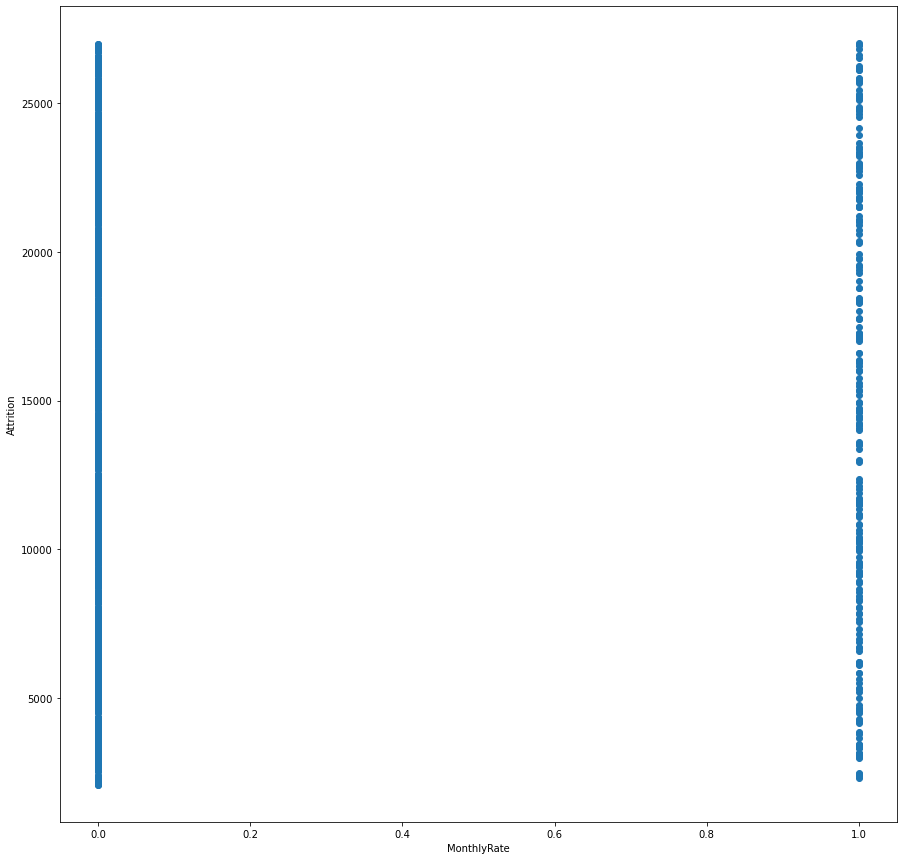

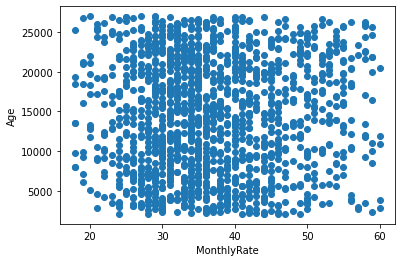

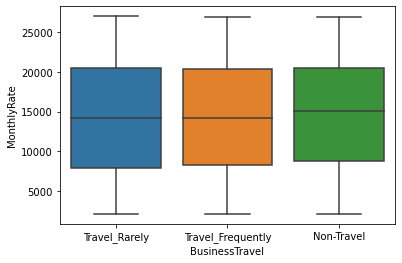

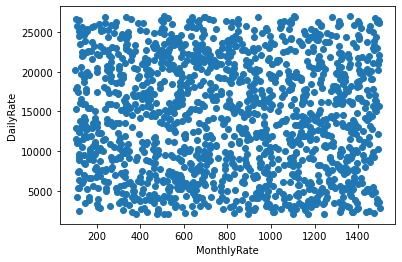

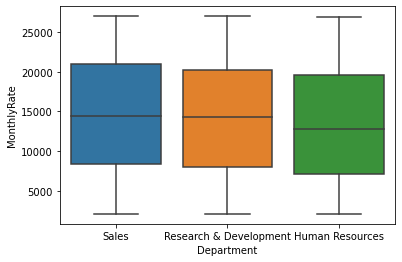

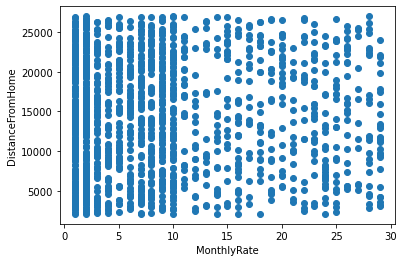

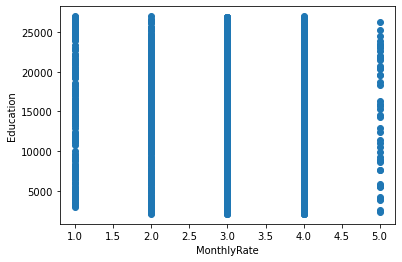

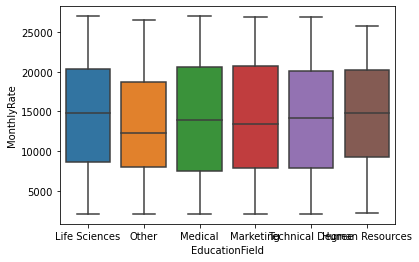

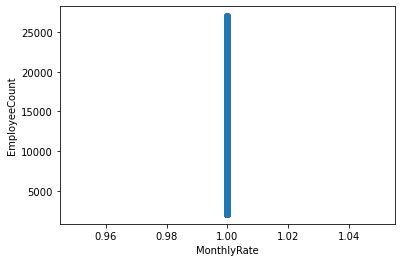

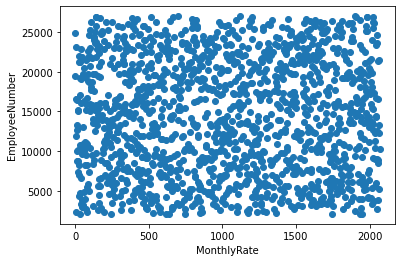

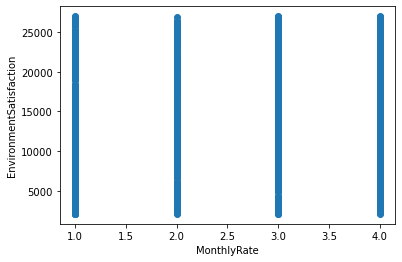

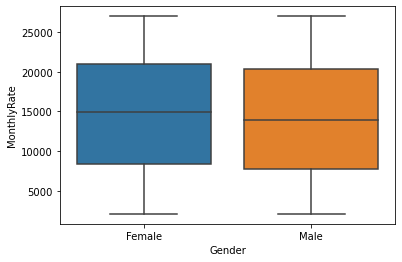

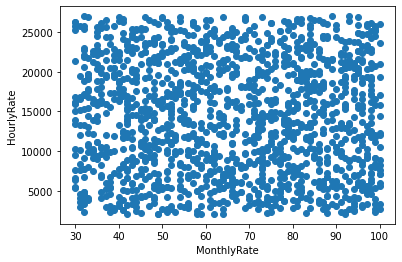

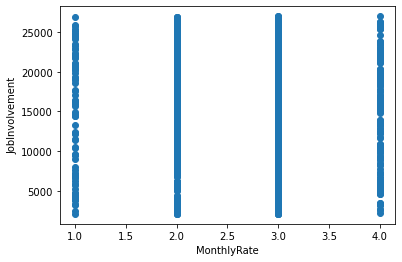

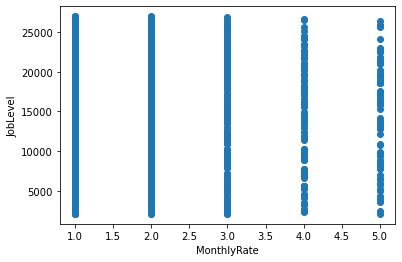

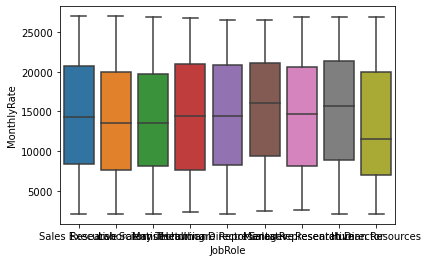

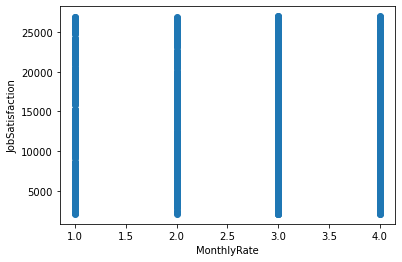

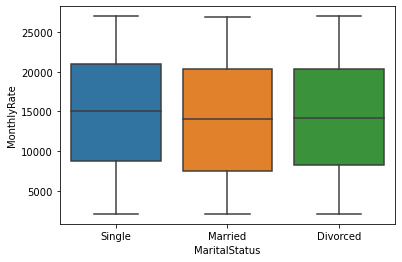

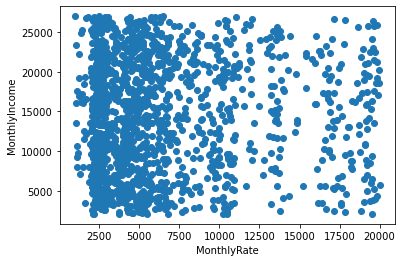

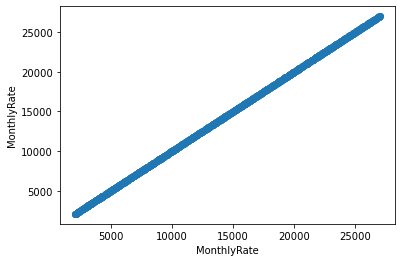

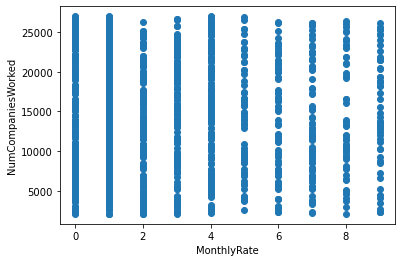

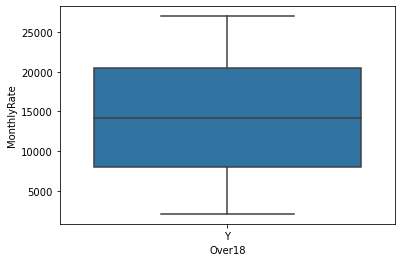

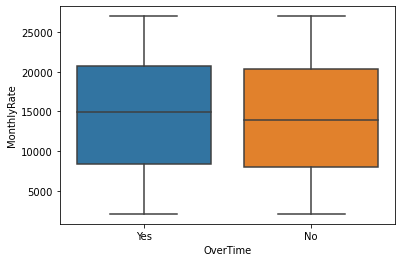

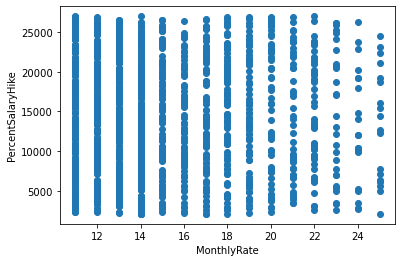

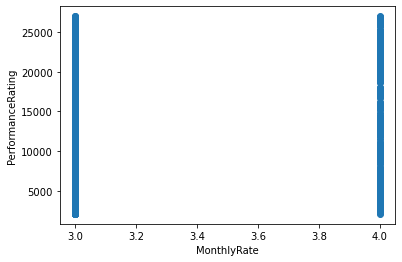

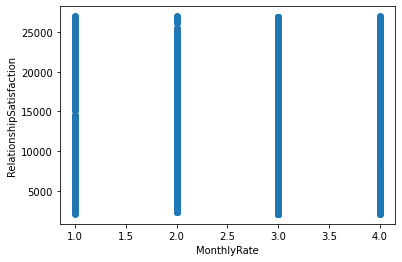

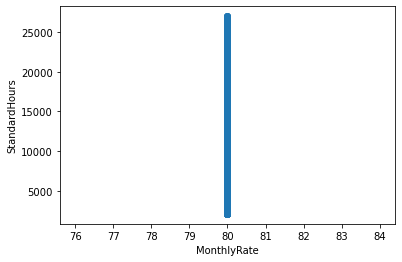

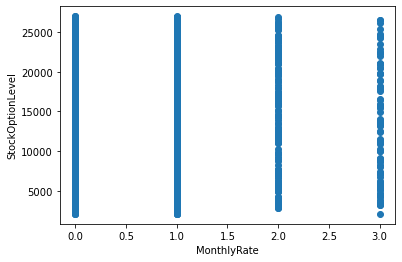

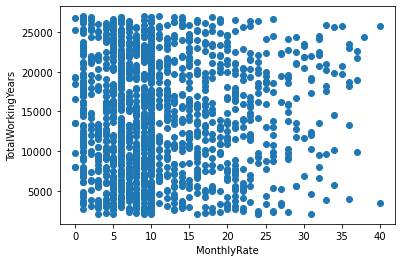

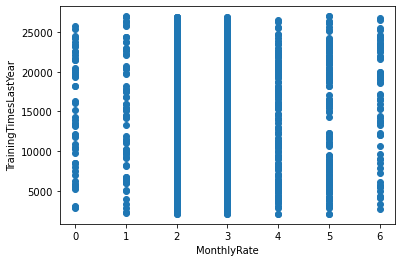

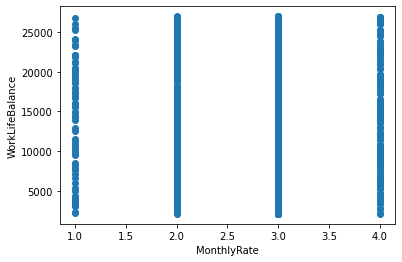

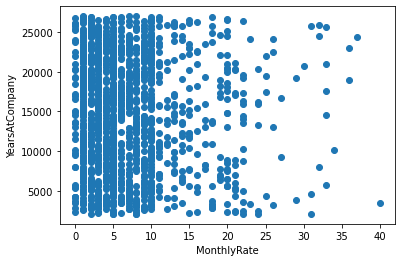

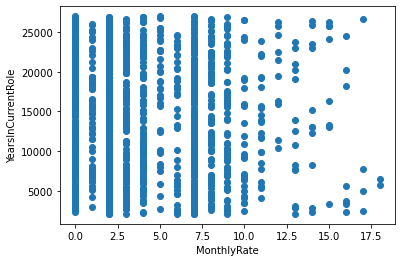

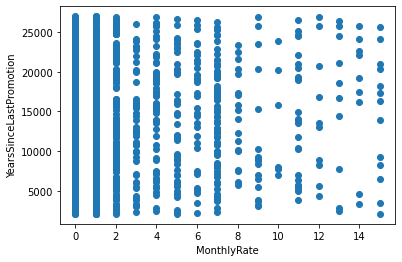

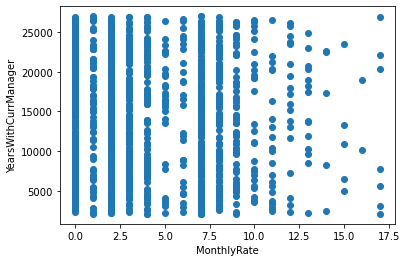

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(15,15))

for i in A.columns:
    if(A[i].dtypes == 'object'):
        sb.boxplot(A[i],A.MonthlyRate)      #Boxplot between categorical and continuous columns
        plt.xlabel(i)
        plt.ylabel('MonthlyRate')
        plt.show()
        
    else:
        plt.scatter(A[i],A.MonthlyRate)     # Scatter plot between continuous and continuous columns
        plt.xlabel('MonthlyRate')
        plt.ylabel(i)
        plt.show()
        

In [8]:
from PM8wd import preprocessing,outliers
X1 = preprocessing(X)
ol = outliers(X1)

In [9]:
X =X.drop(index=ol,axis=0)
Y =Y.drop(index=ol,axis=0)   #remove the oultiers

In [10]:
X.index = range(0,X.shape[0])
Y.index = range(0,Y.shape[0])

In [11]:
from PM8 import ANOVA
for i in A.columns:
    if(A[i].dtypes == "object"):
        print("MonthlyRate vs ",i,":---->",ANOVA(A,i,"MonthlyRate"))

MonthlyRate vs  BusinessTravel :----> 0.838
MonthlyRate vs  Department :----> 0.57
MonthlyRate vs  EducationField :----> 0.753
MonthlyRate vs  Gender :----> 0.112
MonthlyRate vs  JobRole :----> 0.779
MonthlyRate vs  MaritalStatus :----> 0.31
MonthlyRate vs  Over18 :----> nan
MonthlyRate vs  OverTime :----> 0.412


In [12]:
X.drop(labels=["BusinessTravel","EducationField","JobRole","Over18"],axis=1)  #drop the columns which is not important

,Age,DailyRate,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,Sales,1,2,1,2,Female,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,279,Research & Development,8,1,2,3,Male,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,Research & Development,2,2,4,4,Male,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,Research & Development,3,4,5,4,Female,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,Research & Development,2,1,7,1,Male,40,3,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,36,884,Research & Development,23,2,2061,3,Male,41,4,...,3,3,1,17,3,3,5,2,0,3
1383,39,613,Research & Development,6,1,2062,4,Male,42,2,...,3,1,1,9,5,3,7,7,1,7
1384,27,155,Research & Development,4,3,2064,2,Male,87,4,...,4,2,1,6,0,3,6,2,0,3
1385,49,1023,Sales,2,3,2065,4,Male,63,2,...,3,4,0,17,3,2,9,6,0,8


# Preprocessing

In [13]:
from PM8 import preprocessing
Xnew = preprocessing(X)

In [14]:
Xnew

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.536681,0.734325,-1.011249,-0.876177,-1.702014,-0.665328,1.388670,0.376231,0.043309,1.143776,...,0,0,1,0,0,0,1,1,0,1
1,1.442111,-1.307769,-0.145521,-1.853858,-1.700354,0.251978,-0.239091,-1.034126,0.043309,-0.673426,...,0,1,0,0,0,1,0,1,1,0
2,0.083966,1.406752,-0.887573,-0.876177,-1.697034,1.169285,1.290017,-1.034126,-0.941432,0.235175,...,0,0,0,0,0,0,1,1,0,1
3,-0.368749,1.453896,-0.763898,1.079185,-1.695374,1.169285,-0.485721,0.376231,-0.941432,0.235175,...,0,1,0,0,0,1,0,1,0,1
4,-1.047821,-0.533609,-0.887573,-1.853858,-1.692054,-1.582635,-1.274939,0.376231,-0.941432,-0.673426,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,0.193406,1.709609,-0.876177,1.717604,0.251978,-1.225613,1.786588,0.043309,1.143776,...,0,0,0,0,0,1,0,1,1,0
1383,0.310324,-0.479021,-0.392872,-1.853858,1.719264,1.169285,-1.176286,-1.034126,1.028050,-1.582027,...,0,0,0,0,0,1,0,1,1,0
1384,-1.047821,-1.615447,-0.640223,0.101504,1.722584,-0.665328,1.043387,1.786588,0.043309,-0.673426,...,0,0,0,0,0,1,0,1,0,1
1385,1.442111,0.538304,-0.887573,0.101504,1.724244,1.169285,-0.140439,-1.034126,0.043309,-0.673426,...,0,0,1,0,0,1,0,1,1,0


# Split data in training and testing

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# create model using MLR

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xval)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(yval,pred_ts)
print(tr_err,ts_err)

5921.169311801959 6522.084027562967


# create model using KNN

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
model = knn.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xval)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(yval,pred_ts)
print(tr_err,ts_err)

5245.178178539224 6820.2553956834545


# create model using Decision tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=31)
model = dtr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xval)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(yval,pred_ts)
print(tr_err,ts_err)

0.0 8641.471223021583


# Regularize

In [19]:
from sklearn.linear_model import Ridge

def reg(mob):
    model = mob.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xval)

    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,pred_tr)
    ts_err = mean_absolute_error(yval,pred_ts)
    print("Training Error:",tr_err)
    print("Testing Error:",ts_err) 
    return ts_err

In [20]:
Q =[]
e = 0
for i in range(0,2000):
    Q.append(round(e,3))
    e= e+ 1

In [21]:

for i in Q:
    rr = Ridge(alpha=i)
    print("----------","Alpha",i,"---------")
    reg(rr)

---------- Alpha 0 ---------
Training Error: 6009.816952209198
Testing Error: 6563.010791366906
---------- Alpha 1 ---------
Training Error: 5922.921041027691
Testing Error: 6517.647688261021
---------- Alpha 2 ---------
Training Error: 5924.137712281124
Testing Error: 6515.444687073791
---------- Alpha 3 ---------
Training Error: 5925.405482897458
Testing Error: 6514.152408432327
---------- Alpha 4 ---------
Training Error: 5926.747415402118
Testing Error: 6513.26851846336
---------- Alpha 5 ---------
Training Error: 5927.890587817465
Testing Error: 6512.570856445645
---------- Alpha 6 ---------
Training Error: 5928.900691103208
Testing Error: 6511.981737833357
---------- Alpha 7 ---------
Training Error: 5929.824159387786
Testing Error: 6511.460261467086
---------- Alpha 8 ---------
Training Error: 5930.64848953703
Testing Error: 6510.983125037934
---------- Alpha 9 ---------
Training Error: 5931.390042325946
Testing Error: 6510.536258185055
---------- Alpha 10 ---------
Training Err

In [22]:
rr =Ridge(alpha=232)
reg(rr)

Training Error: 5964.780120380656
Testing Error: 6461.777593745827


6461.777593745827